In [1]:
import numpy as np
from matplotlib import pyplot as plt
from bloom_filter import BloomFilter

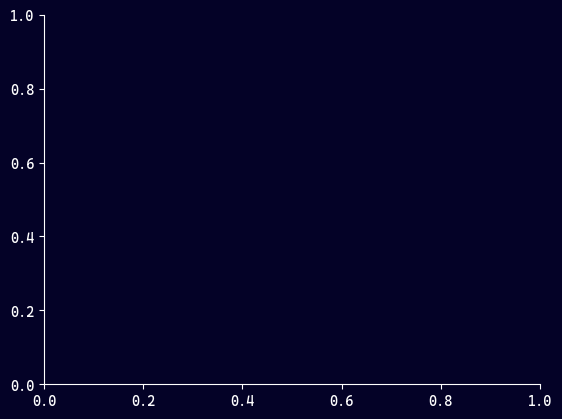

In [2]:
    
plt.rcParams["font.family"] = "Cascadia Mono"
# change background color
plt.rcParams['axes.facecolor'] = '#040227'
# change the entire screen color
plt.rcParams['figure.facecolor'] = '#040227'
plt.rcParams['savefig.facecolor'] = '#040227'


# change color of axis lines
plt.rcParams['axes.edgecolor'] = '#FFFFFF'
# change color of tick labels
plt.rcParams['ytick.color'] = '#FFFFFF'
plt.rcParams['xtick.color'] = '#FFFFFF'
# change color of axes labels
plt.rcParams['axes.labelcolor'] = '#FFFFFF'
# change color of figure title
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'
# change color of axes title
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlecolor'] = '#FFFFFF'

plt.rcParams['axes.titlesize'] = 24

# make lines a little bit thicker
plt.rcParams['lines.linewidth'] = 5

# remove top and right borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [3]:
# Read in english words
with open("english.txt", encoding="utf-8") as f:
    english_words = f.read().split()

with open("filtered_french.txt", encoding="utf-8") as f:
    french_words = f.read().split()

In [4]:
desired_fp_rate = 1
rates = []
sizes = []
for i in range(8):
    desired_fp_rate /= 10
    # Create a bloom filter and insert the english words
    bloom_filter = BloomFilter(len(english_words), desired_fp_rate)

    rates.append(desired_fp_rate)
    sizes.append(bloom_filter.size / 8 / 1024)

([<matplotlib.axis.XTick at 0x1913ef89030>,
 [Text(0.1, 0, '10%'),
  Text(0.01, 0, '1%'),
  Text(0.001, 0, '0.1%'),
  Text(0.0001, 0, '0.01%'),
  Text(1e-05, 0, '0.001%'),
  Text(1.0000000000000002e-06, 0, '0.0001%'),
  Text(1.0000000000000002e-07, 0, '0.00001%'),
  Text(1.0000000000000002e-08, 0, '0.000001%')])

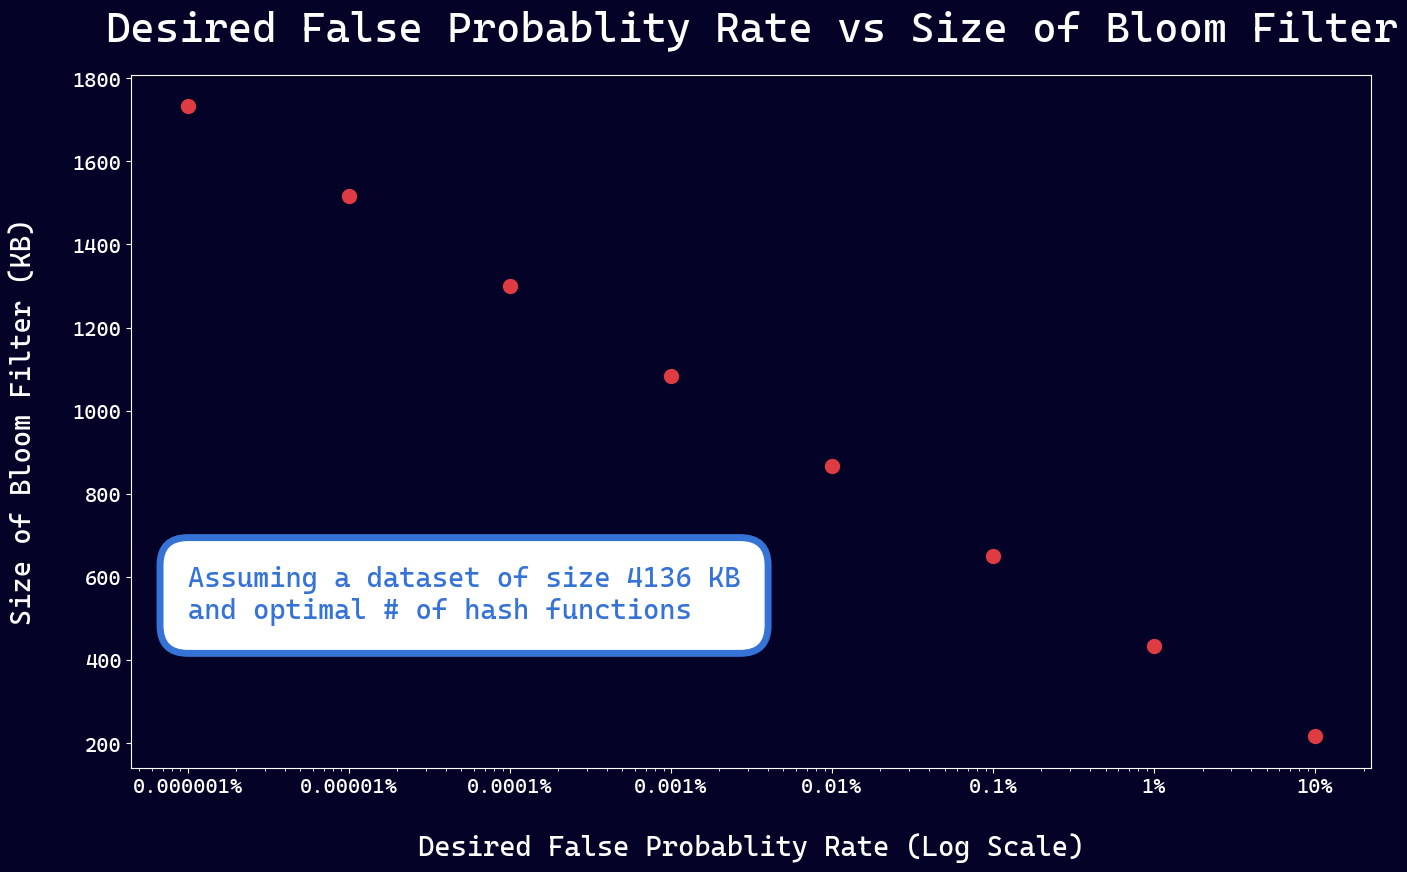

In [5]:
plt.figure(figsize=(16, 9))


plt.xlabel('Desired False Probablity Rate (Log Scale)', size=20, labelpad=25)
plt.ylabel('Size of Bloom Filter (KB)', size=20, labelpad=25)
plt.title('Desired False Probablity Rate vs Size of Bloom Filter', size=30, pad=25)
plt.scatter(rates, sizes, color="#df3b43", s=100)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
bbox = {'facecolor': 'white', 'pad': 1, 'boxstyle': 'round', "edgecolor": "#3673d6", "linewidth": 5}
# make x-axis logarithmic
plt.xscale('log')
ticks_labels = ['10%', '1%', '0.1%', '0.01%', '0.001%', '0.0001%', '0.00001%', '0.000001%']

plt.text(0.00000001, 500, "Assuming a dataset of size 4136 KB\nand optimal # of hash functions", size=20, color="#3673d6", bbox=bbox)

plt.xticks(rates, ticks_labels)


In [6]:
count = 0
len_counter = 0
for word in english_words:
    len_counter += len(word)
    count += memoryview(word.encode('utf-8')).nbytes

count / 1024, len_counter / len(english_words), len(english_words)

(3412.7998046875, 9.442474432931196, 370105)

In [7]:

fp_rate = 0.01 # 0.1%
num_of_words = 370105
avg_letters_per_word = list(range(2, 65))
sizes = []
percentages_saved = []

bloom_filter = BloomFilter(num_of_words, fp_rate)
for i in avg_letters_per_word:
    # num of KB for the words
    size_of_words = num_of_words * i / 1024
    sizes.append(size_of_words)
    # num of KB for the bloom filter
    size_of_filter = bloom_filter.size / 8 / 1024
    # percentage saved
    percentage_saved = (1 - size_of_filter / size_of_words) * 100
    percentages_saved.append(percentage_saved)


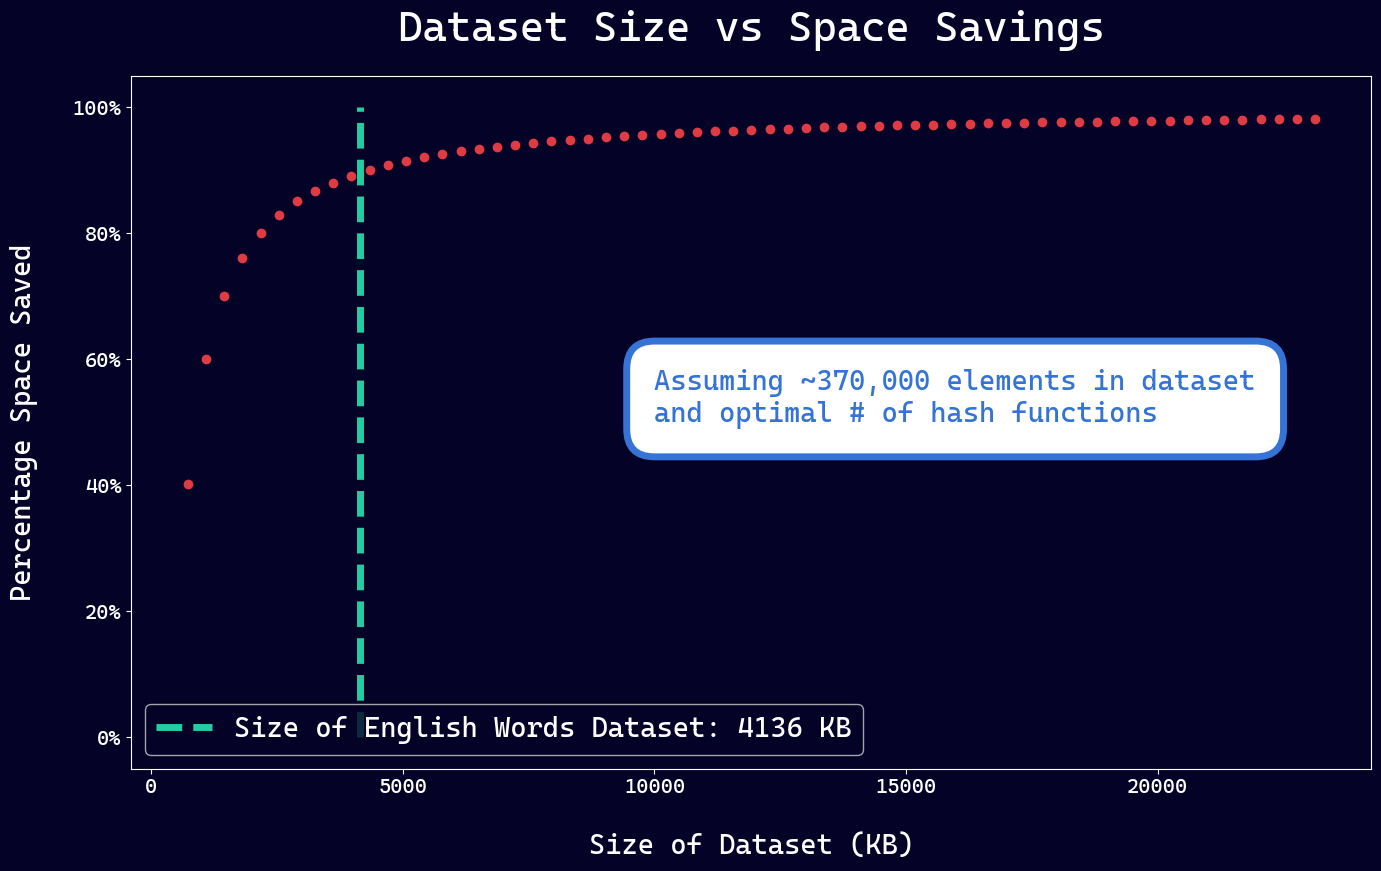

In [10]:
plt.figure(figsize=(16, 9))

plt.xlabel('Size of Dataset (KB)', size=20, labelpad=25)
plt.ylabel('Percentage Space Saved', size=20, labelpad=25)
plt.title('Dataset Size vs Space Savings', size=30, pad=25)
plt.vlines(4136, 0, 100, color="#21cda2", linestyles='dashed', label=f"Size of English Words Dataset: {4136} KB")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(labelcolor='#FFFFFF', fontsize=20)

plt.text(10000, 50, "Assuming ~370,000 elements in dataset\nand optimal # of hash functions", size=20, color="#3673d6", bbox=bbox)

# Add percent signs to y axis labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}%".format(int(x))))

plt.scatter(sizes, percentages_saved, color="#df3b43")